# Notebook 2

## 1D smoothing

After going through correlation and convolution in the pervious notebook, it's time to now think about the applications of convolution in image processing. Two possible applications that we will be discussing in this and next notebook are 1D smoothing to reduce the effect of noise and 1D image differentiation. In this notebook, we will go over 1D smoothing in detail!

When a picture is taken by a camera, there are a lot of ways in which noise can be introduced in the image:

</br>

<li> Thermal agitation of electrons in the camera </li>
<li> The sensors in the camera add noise to the picture </li> 
<li> Change in lighting varies number of photons that hit during picture's exposure period </li>
<li> Quantisation of pixels to integer values </li>

The inherent intent for smoothing is to replace the pixel values by its neighbouring pixel values in such a way that we retain information while reducing the level of noise in the image. We want to perform smoothing because when we will go over image differentiation to detect motion, we know that differentiation attenuates noise so we want to smooth the picture before differentiating. 

In order to reduce the impact of noise in the picture, there are several techniques of smoothing can be utilized. However, we are going to focus on two methods here, 1D smoothing using an averaging kernel (*box filter*) and gaussian kernel (*Gaussian Filter*). Both 

## Box filter

In case of a box filter, we use an averaging kernel that replaces each pixel with an average of its neighbouring pixels. It means multiplying each value by 1/k for a window size of kx1 and then adding up the results. 

This is also what we were trying to achieve with convolution. This means convolving the image with a filter with values 1/k. 

For example, 

This is known as a box filter since all the values in the kernel are equal. Mathematically, averaging reduces the variance of noise in the image, resulting in smoothing. Smoothing also results in blurring which is due to loss of finer details in the image. So, we want to be a little careful while smoothing so that we do not lose on important details in the picture losing some gradients in the image. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#the 1D convolution function

def convolution_1d (image,kernel,mode):
    
    """
    
    Returns the discrete, linear convolution of two one-dimensional sequences.
    
    Parameters
    ----------
    image: (m,) array_like
        First one-dimensional input array.
    kernel : (k,) array_like
        Second one-dimensional input array.
        
    mode : {'full', 'valid', 'same'}
    
        'full':
          This returns the convolution
          at each point of overlap, with an output shape of (m+k-1,). At
          the end-points of the convolution, the signals do not overlap
          completely, and boundary effects may be seen.
          
        'same':
          Mode 'same' returns output of length (m,).  Boundary
          effects are still visible.
          
        'valid':
          Mode 'valid' returns output of length
          (m-k+1).  The convolution product is only given
          for points where the signals overlap completely.  Values outside
          the signal boundary have no effect.
          
    Returns
    -------
    J : ndarray
        Discrete, linear convolution of image and kernel
    
    Examples
    --------
    >>> convolve_1d([1, 2, 3], [0, 1, 0.5],"full")
    array[0, 1, 2.5, 4.0, 1.5]
    >>> convolve_1d([1,2,3],[0,1,0.5], 'same')
    array([1.0 , 2.5,  4.0])
    >>> convolve_1d([1,2,3],[0,1,0.5], 'valid')
    array([2.5])
    
    """
    #flipping the kernel, as per the definition
    kernel=kernel[::-1]
    
    #defining k as the kernel is assumed to be of length 2k+1
    k=(len(kernel)-1)//2
    
    if mode=="same":
         #defining shift for taking an inner product of image and kernel
        shift=0
    if mode=="full":
        shift=-k
    if mode=="valid":
        shift=k
    
    #initializing an empty array to store the final output
    J=[]
    
    for i in range(0+shift,(len(image)-shift)):
        #storing the sum in result
        result=0
        
        #iterating over kernel with count
        count=0
        for j in range(i-k,i+k+1):
            
            if j<len(image):
                
                if (j<0):
                    result=0

                elif(j>=0):
                    result+=image[j]*kernel[count]

                count+=1
                
        J.append(result)
    return np.asarray(J,dtype=int)

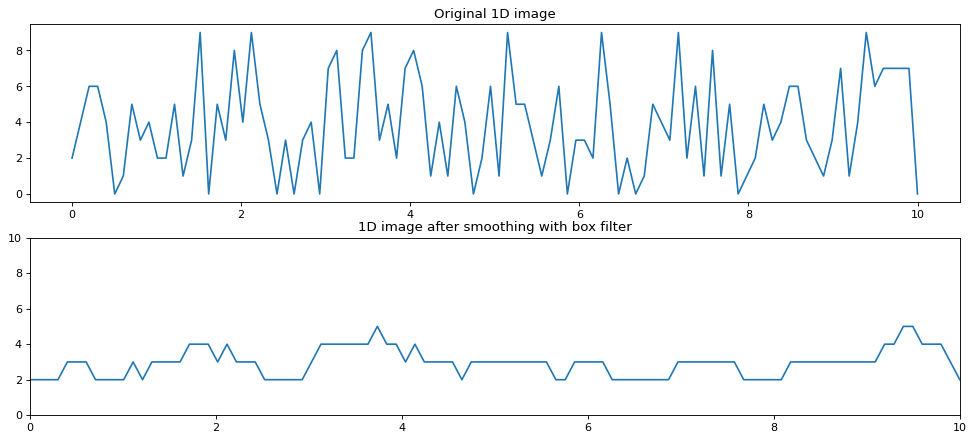

In [2]:
##Python implementation of 1D box filter 

from matplotlib.pyplot import figure
from numpy import random
figure(figsize=(15, 10), dpi=80)


plt.subplot(3,1,1)
I=random.randint(0, 10, 100, dtype=int)
x = np.linspace(0,10,100)
plt.plot(x,I)
plt.title("Original 1D image",loc="center")
H=1/10*np.ones(10)
J=convolution_1d(I,H,"same")

plt.subplot(3,1,2)
x = np.linspace(0,10,100)
plt.plot(x,J)
plt.title('1D image after smoothing with box filter',loc="center")

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show();

## Gaussian filter

One of the main disadvantages of averaging kernel is that it assigns same weight to the neighbouring pixels. A better approach to this is to make use of Gaussian filter which gives more weightage to the central pixels and less to the farther away neighbours. 

Here, the coefficient of the kernel are Gaussian, denoted by:


$G = \exp\left( -\frac{1}{2}\left(\frac{u}{\sigma}\right)^{\!2}\,\right)$

Here, $\sigma$, the standard deviation determines the amount of smoothing. For greater values of $\sigma$, more smoothing occurs.

Gaussian kernel is a preferrable filter in computer vision for a variety of reasons:

</br>

<li> It is rotationally symmetric kernel </li>
<li> It gives more weightage to the nearby pixels than the distant ones. It is more effective at retaining the information in the image while reducing noise </li>
<li> The Gaussian function of real variable u is differential infinitely </li>
<li> It is always positive and is elemental in certain types of edge detectors </li>
<li> Gaussian kernel is separable in 2D which makes convolution effective </li>

In [3]:
import numpy as np
   
def gkern(l=5, sig=1.):
    """\
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    return gauss / np.sum(gauss)

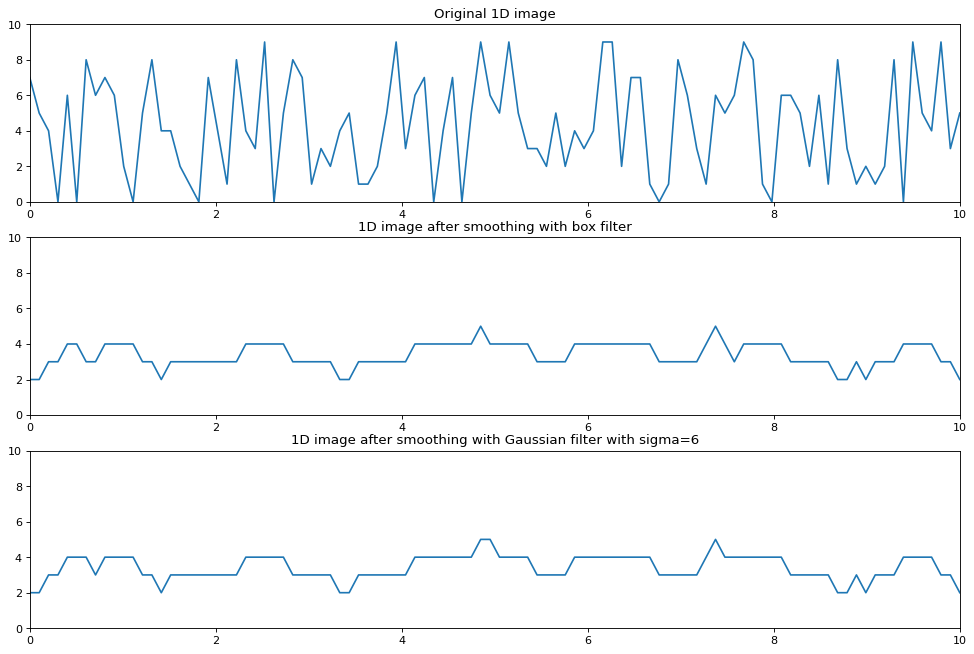

In [4]:
## Python implementation of 1D gaussian filter 

#generating a gaussian smoothing kernel with mean 0.2 (same as box filter) and standard deviation 0.1

G = gkern(l=10, sig=6)

from matplotlib.pyplot import figure
from numpy import random
figure(figsize=(15, 10), dpi=80)

plt.subplot(3,1,1)
I=random.randint(0, 10, 100, dtype=int)
x = np.linspace(0,10,100)
plt.plot(x,I)
plt.title("Original 1D image",loc="center")
plt.xlim(0, 10)
plt.ylim(0, 10)
H=1/10*np.ones(10)
J=convolution_1d(I,H,"same")

plt.subplot(3,1,2)
x = np.linspace(0,10,100)
plt.plot(x,J)
plt.title('1D image after smoothing with box filter',loc="center")
plt.xlim(0, 10)
plt.ylim(0, 10)


C=convolution_1d(I,G,"same")
plt.subplot(3,1,3)
x = np.linspace(0,10,100)
plt.plot(x,C)
plt.title('1D image after smoothing with Gaussian filter with sigma=6',loc="center")

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show();

The difference is more pronounced when we see images in 2D. However, we can still see smoothing with Gaussian filter with better retention of information than box filter

### References

1. Duke CS 527 Spring 2022 Lecture Notes 1: https://courses.cs.duke.edu//spring22/compsci527/notes/n_01_convolution.pdf

2. Penn State University Lecture notes: https://www.cse.psu.edu/~rtc12/CSE486/lecture04.pdf

3. Scipy Cookbook: https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html